# Targeting the best market for ads

Simple project to find the best market to advertise in for an e-learning company. 

In [2]:
import pandas as pd

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

print(survey.shape)
pd.options.display.max_columns = 100
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,...,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,...,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20

Notes:
* Imported a ready-made survey from freeCodeCamp
 * Kicks off our exploration using available data
 * Allows us to make observations and decide if we need to invest further time and resources
* Survey for new coders (target aligns with our goal of teaching new coders)

In [3]:
survey['JobRoleInterest'].value_counts(normalize=True, ascending=False) * 100

Full-Stack Web Developer                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                 6.435927
  Data Scientist                                                                                                                          2.173913
Back-End Web Developer                                                                                                                    2.030892
  Mobile Developer                                                                                                                        1.673341
                                                                                                                                           ...    
Information Security, Game Developer, Back-End Web Developer,   Mobile Developer                                      

In [5]:
# Remove the NA
interests_clean = survey['JobRoleInterest'].dropna()

# Split out all of the interests
interests_split = interests_clean.str.split(',')

interests_number = interests_split.apply(lambda x: len(x))
interests_number.value_counts(normalize=True, ascending=False) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

In [7]:
# Remove any respondants with no interests
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

# Create a frequency table displaying the location of the respondants
frequency_number = survey['CountryLive'].value_counts()
frequency_pct = survey['CountryLive'].value_counts(normalize=True) * 100

pd.DataFrame(data = {'Respondants': frequency_number,
                      'Percent': frequency_pct}
            )

,Respondants,Percent
United States of America,5791,37.760824
India,1400,9.128847
United Kingdom,757,4.936098
Canada,616,4.016693
Brazil,364,2.373500
...,...,...
Bermuda,1,0.006521
Tajikistan,1,0.006521
Kuwait,1,0.006521
New Caledonia,1,0.006521


Observation: Clearly the US and India are the top two markets for new developers, but let's take a closer look at the top four (US, India, UK, and Canada).

In [22]:
# Replace 0s with 1s to avoid division by 0
survey_clean['MonthsProgramming'].replace(0,1, inplace = True)

# Find out how much each students spends per month
survey_clean['Per_Month_Spend'] = survey_clean['MoneyForLearning'] / survey_clean['MonthsProgramming']

# Clean by removing null answers
survey_clean = survey_clean[survey_clean['Per_Month_Spend'].notnull()]
survey_clean = survey_clean[survey_clean['CountryLive'].notnull()]

# Check data
survey_clean['CountryLive'].value_counts().head(10)

United States of America    2827
India                        457
United Kingdom               271
Canada                       236
Poland                       118
Germany                      111
Brazil                       105
Australia                     98
Russia                        79
Ukraine                       78
Name: CountryLive, dtype: int64

In [23]:
# Group by country and examine the top four countries by average spend

mean_spend = survey_clean.groupby('CountryLive').mean()
mean_spend['Per_Month_Spend'][['United States of America', 'India', 'United Kingdom','Canada']]


CountryLive
United States of America    236.546913
India                       136.874737
United Kingdom               46.878633
Canada                      115.434876
Name: Per_Month_Spend, dtype: float64

Observations
* India is interesting
* May need to clean up any outliers

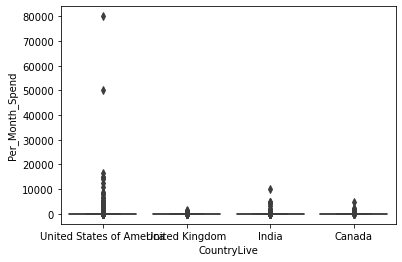

In [26]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

survey_four = survey_clean[survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Create boxplot
sns.boxplot(y='Per_Month_Spend', x='CountryLive', data=survey_four)
plt.show()

Observations:
* Outliers are any spend higher than 20,000

In [29]:
survey_four = survey_four[survey_four['Per_Month_Spend'] < 20000]

survey_four_mean = survey_four.groupby('CountryLive').mean()
print(survey_four_mean['Per_Month_Spend'])

CountryLive
Canada                      115.434876
India                       136.874737
United Kingdom               46.878633
United States of America    190.696680
Name: Per_Month_Spend, dtype: float64


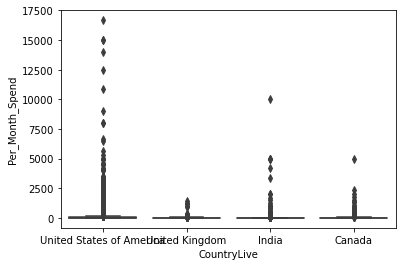

In [30]:
sns.boxplot(y='Per_Month_Spend', x='CountryLive', data=survey_four)
plt.show()